# Features affecting Trip Duration for Ford GoBikes
## by **Mark Wamiru**

## Investigation Overview

In my investigation, I wanted to figure out the features that had a role in the length or duration of bike trips. My main focus was on **duration**, **gender**, **user_type** and **bike_sharing**.

## Dataset Overview

The data consisted of duration in seconds and attributes of approximately 183,000 bike trips. The attributes included the gender, user type, bike sharing as well as additional features such as start_staion_id, end_staion_id and bike_id just to name a few. Approximately 8500 records were removed from the analysis due to inconsistencies or missing information. I added a new feature, **age**, which was used in the analysis.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
fgb=pd.read_csv('201902-fordgobike-tripdata.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [3]:
fgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [4]:
fgb['start_time'] = pd.to_datetime(fgb['start_time'])
fgb['end_time'] = pd.to_datetime(fgb['end_time'])


fgb.start_station_id = fgb.start_station_id.astype(str)
fgb.end_station_id = fgb.end_station_id.astype(str)
fgb.bike_id = fgb.bike_id.astype(str)

fgb.dropna(inplace=True)

fgb.user_type=fgb.user_type.astype('category')
fgb.member_gender=fgb.member_gender.astype('category')
fgb.bike_share_for_all_trip=fgb.bike_share_for_all_trip.astype('category')
fgb['age'] = (2019 - fgb['member_birth_year']).astype(int)

## Distribution of trip duration

Most trips were about 500 seconds


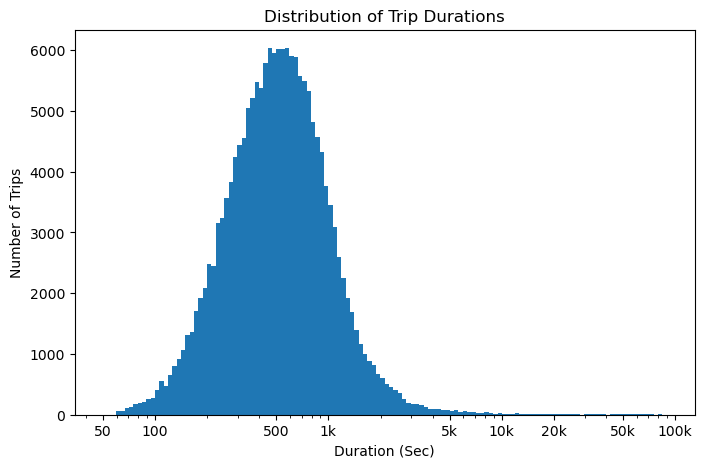

In [5]:
# Plotting the log scale
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(fgb['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = fgb, x = 'duration_sec', bins=bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

## Distribution of Gender

In general, males went for trips more than any of the other genders, making up 74.59% of the distribution.

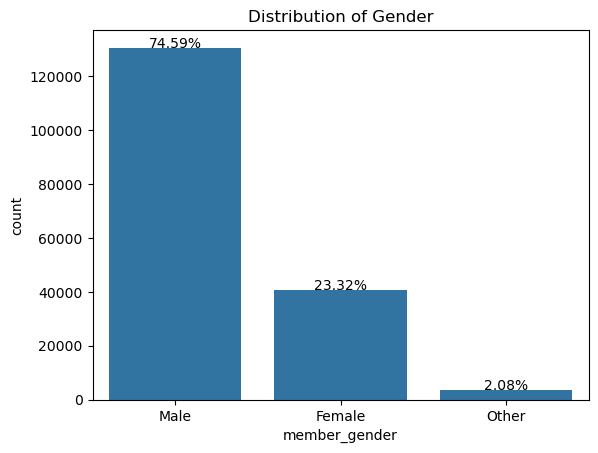

In [6]:
#Plotting gender distribution
ax = sb.countplot(data = fgb, x = 'member_gender',  color=sb.color_palette()[0], order=fgb.member_gender.value_counts().index)

total = len(fgb)
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.title('Distribution of Gender');

## Distribution of duration in relation to gender
Males tended to have the shortest trips among the 3 genders, with **others** having the longest trips.

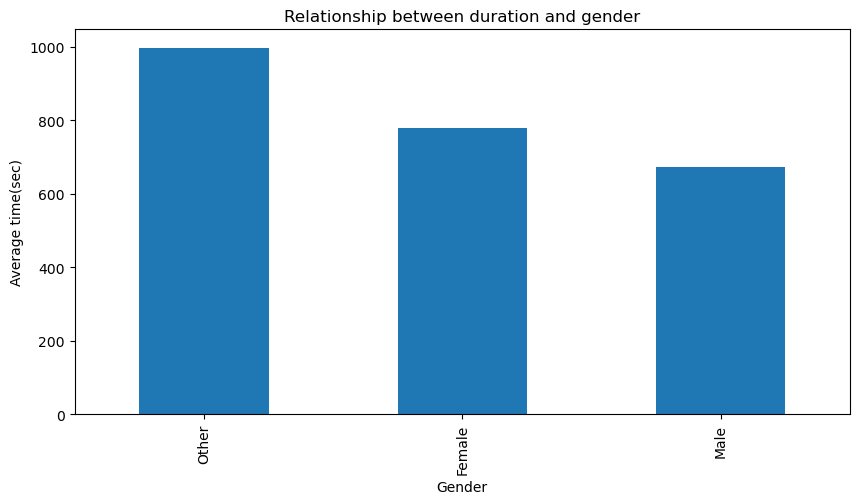

In [7]:
plt.figure(figsize = (10,5), dpi = 100)
fgb.groupby('member_gender')['duration_sec'].mean().sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average time(sec)')
plt.title("Relationship between duration and gender");

## Trip duration across user_type and bike_share_for_all_trip

Bike sharing isn't available for user type customers or customers never requested to share bikes. However, customer user type tend to have longer trips than subscriber in the category forthose who don't share bikes.

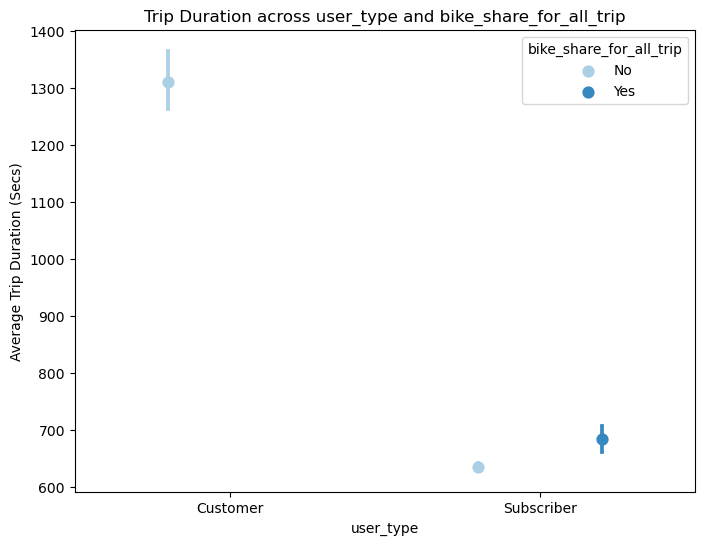

In [8]:
# plotting to show relationship user_type, duration and bike_share_for_all_trip
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = fgb, x ='user_type', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across user_type and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True);

## Trip duration across gender and bike_share_for_all_trip
The `other` gender group travels for the longest duration for bike sharing and non bike sharing categories, followed by `female` then `male`.

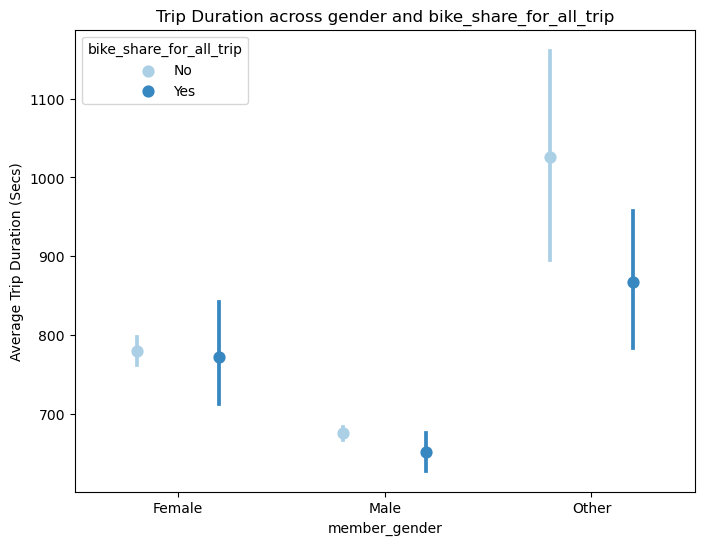

In [9]:
# plotting to show relationship between gender, duration and bike_share_for_all_trip
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = fgb, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')
ax.set_yticklabels([],minor = True);

In [ ]:
!jupyter nbconvert Ford_GoBike_System_Data_Part_2.ipynb --to slides --post serve --no-input --no-prompt